
# Melanoma Detection Assignment

## Problem Statement 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The data set contains the following diseases:

* Actinic keratosis
* Basal cell carcinoma
* Dermatofibroma
* Melanoma
* Nevus
* Pigmented benign keratosis
* Seborrheic keratosis
* Squamous cell carcinoma
* Vascular lesion

### Steps involved in this notebook:
    
Step 1: Importing the data  
Step 2: Load using keras.preprocessing  
Step 3: Visualize the data  
Step 4: Model building - I  
Step 5: Train the model - I  
Step 6: Model building - II  
Step 7: Train the model - II  
Step 8: Train the model - III


### Step 1: Importing the data

In [1]:
# Import the required libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

!pip install Augmentor
import Augmentor

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import the dataset

from google.colab import drive
drive.mount('/content/gdrive',  force_remount = True)

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of all kinds of skin cancer dieseases. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining and updating the train and test dataset (images)

# Train data
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train')

# Test data
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Test')

In [4]:
# Counting the number of images in the train and test dataset (total number of images: 2357)

# Train data image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print('The number of images in train data:', image_count_train)

# Test data image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print('The number of images in train data:', image_count_test)

The number of images in train data: 2239
The number of images in train data: 118


### Step 2: Load using keras.preprocessing

Let's load these images off the disk using the helpful image_dataset_from_directory utility.

In [5]:
# Creating train & validation dataset from the train directory with a batch size of 32. Also, resizing the images to 180*180.

batch_size = 32
img_height = 180
img_width = 180

In [6]:
# Train dataset (with seed size = 123 & resizing the images to the size:  img_height*img_width)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed = 123, validation_split = 0.2, subset = 'training', image_size = (img_height, img_width), batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Validation (test) dataset (with seed size = 123 & resizing the images to the size:  img_height*img_width)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed = 123, validation_split = 0.2, subset = 'validation', image_size = (img_height, img_width), batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# Creating a list to store the names of different classes of skin cancer in the dataset

class_names = train_ds.class_names
print('Various class names of skin cancer are:', class_names)

Various class names of skin cancer are: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Step 3: Visualize the data

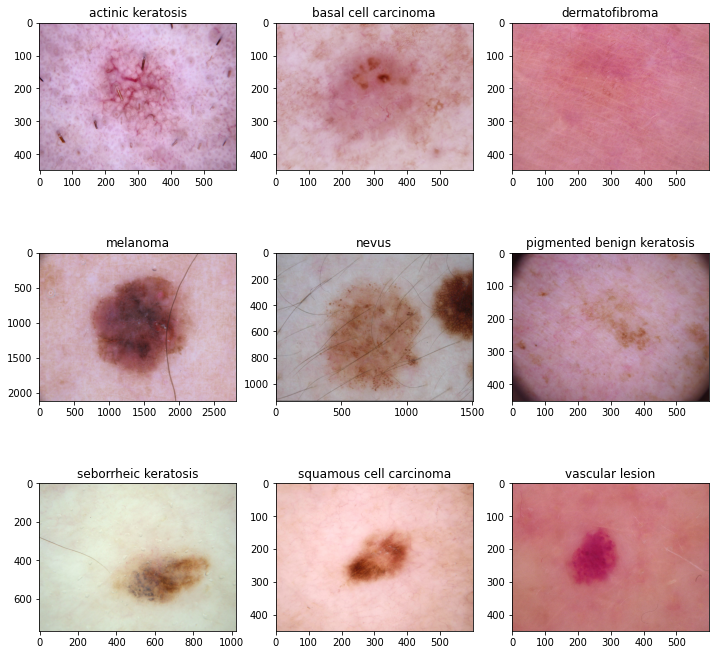

In [9]:
# Visualize an image of all class types

plt.figure(figsize = (12, 12))
for i in range(9): 
  plt.subplot(3, 3, i+1)
  skin_image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(skin_image)  

In [10]:
# Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch & Dataset.prefetch() overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

### Step 4: Model building - I

In [11]:
# Using layers.experimental.preprocessing, we will create a CNN model to detect the 9 classes present in the dataset

num_classes = 9

# Rescaling images to normalize pixel values between (0,1)
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))])
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [12]:
# Compile the model
# Choosing an appropriate optimiser (Adam) and loss function (Cross entropy) for model training

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [13]:
# View the model summary of all the layers

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Step 5: Train the model - I

In [15]:
# Train the model for ~20 epochs

epochs = 20
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs)

Epoch 1/20
56/56 [==============================] - 4s 78ms/step - loss: 0.9473 - accuracy: 0.6529 - val_loss: 1.6927 - val_accuracy: 0.4877
Epoch 2/20
56/56 [==============================] - 4s 77ms/step - loss: 0.9880 - accuracy: 0.6484 - val_loss: 1.6482 - val_accuracy: 0.4989
Epoch 3/20
56/56 [==============================] - 4s 77ms/step - loss: 0.8577 - accuracy: 0.6970 - val_loss: 1.5666 - val_accuracy: 0.5257
Epoch 4/20
56/56 [==============================] - 4s 77ms/step - loss: 0.7805 - accuracy: 0.7165 - val_loss: 1.7794 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 4s 77ms/step - loss: 0.7893 - accuracy: 0.7199 - val_loss: 1.7757 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 4s 78ms/step - loss: 0.7635 - accuracy: 0.7266 - val_loss: 1.9961 - val_accuracy: 0.4541
Epoch 7/20
56/56 [==============================] - 4s 78ms/step - loss: 0.6789 - accuracy: 0.7360 - val_loss: 2.1176 - val_accuracy: 0.4877
Epoch 8/20
56

We can see that the training accuracy is 87.67% whereas, the validation accuracy is 49.66%. We can say that the model is overfitting. We can validate the same by visualizing them. 

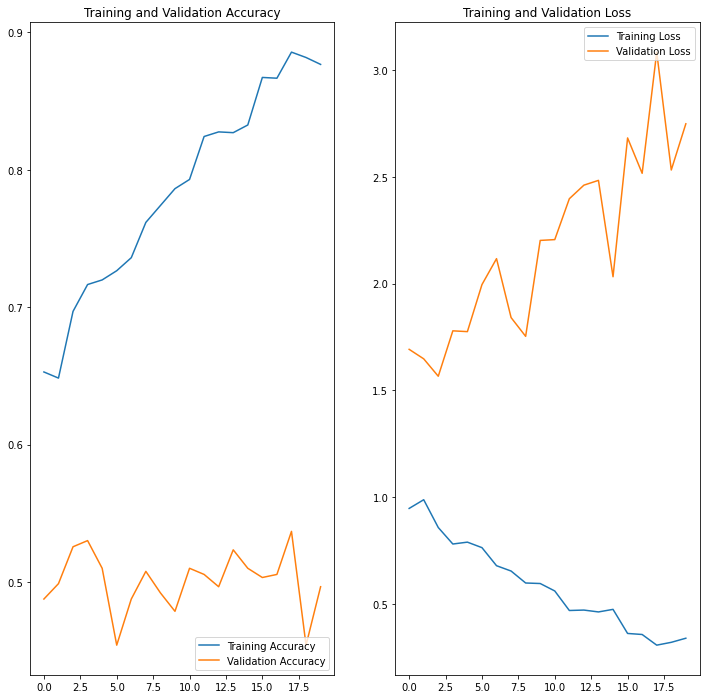

In [16]:
# Visualize the training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

**Insights**  
The model is learning the patterns in the dataset and hence, it is overfiiting. However, we can further train the model to get better results.

In [17]:
# Choosing an appropriate data augmentation strategy to resolve the overfitting issue

data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode = "horizontal_and_vertical", input_shape = (img_height, img_width, 3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode = 'reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor = (0.2, 0.3), width_factor = (0.2, 0.3), fill_mode = 'reflect')
])

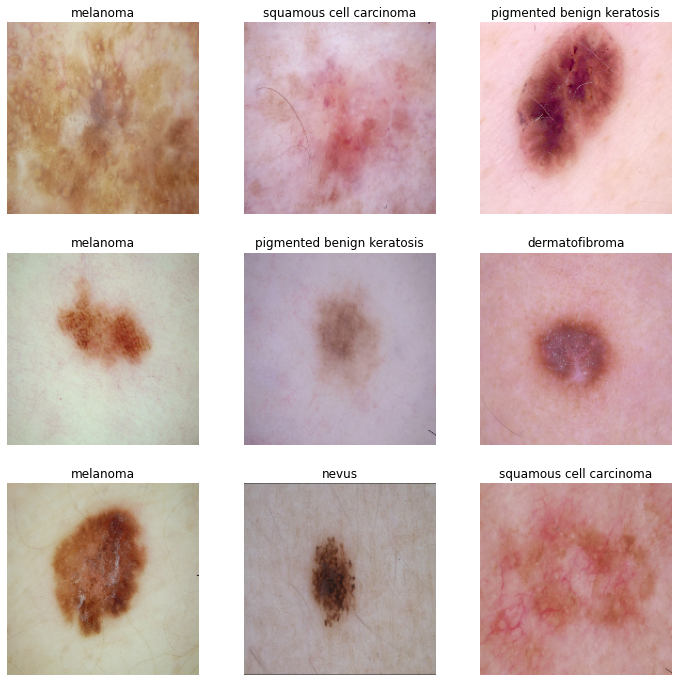

In [18]:
# Visualizing how the augmentation strategy works for one instance of the training image

plt.figure(figsize = (12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Step 6: Model building - II

In [19]:
# Model building on the augmented data using a dropout layer to improvise the overfitting issue

num_classes = 9

# Rescaling images to normalize pixel values between (0,1)
model = Sequential([ data_augument, layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3))])
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [20]:
# Compile the model

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

### Step 7: Train the model - II

In [21]:
# Train the model for ~20 epochs

epochs = 20
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs)

Epoch 1/20
56/56 [==============================] - 7s 93ms/step - loss: 2.0807 - accuracy: 0.1881 - val_loss: 2.0321 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 5s 88ms/step - loss: 2.0274 - accuracy: 0.2009 - val_loss: 2.0141 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 5s 87ms/step - loss: 2.0422 - accuracy: 0.1953 - val_loss: 2.0343 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 5s 87ms/step - loss: 2.0175 - accuracy: 0.1981 - val_loss: 2.0123 - val_accuracy: 0.1946
Epoch 5/20
56/56 [==============================] - 5s 87ms/step - loss: 2.0155 - accuracy: 0.2188 - val_loss: 2.0341 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 5s 87ms/step - loss: 1.9986 - accuracy: 0.2349 - val_loss: 1.9714 - val_accuracy: 0.2819
Epoch 7/20
56/56 [==============================] - 5s 88ms/step - loss: 1.9879 - accuracy: 0.2388 - val_loss: 1.9871 - val_accuracy: 0.2237
Epoch 8/20
56

Looks like the accuracy has gone down to 49.33% on the training dataset and 49.89% on the validation dataset.

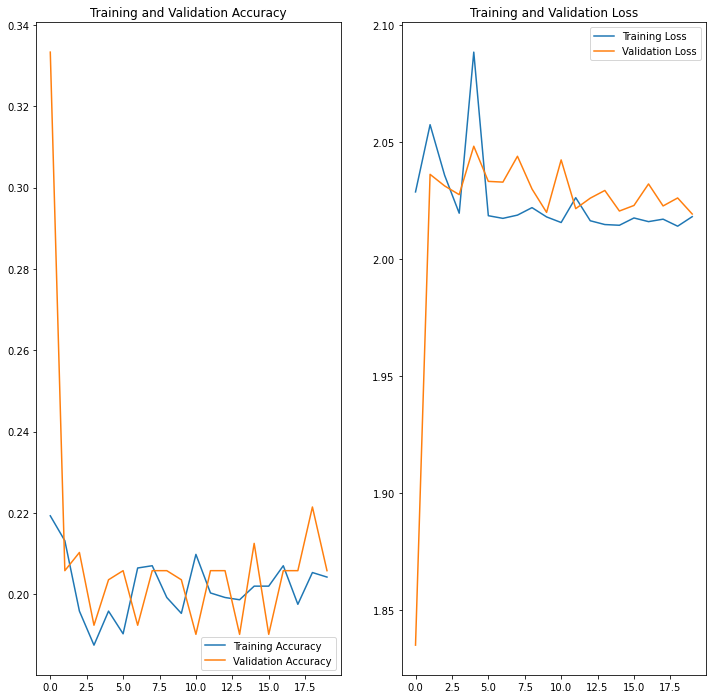

In [21]:
# Visualize the training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

**Insights**  
* We can see that the accuracy between the training and validation datasets have come closer which means that the model does not overfit with augmented data anymore. However, there is not much of an overall improvement.
* The loss between both the datasets (train and test) have come down as well.

In [22]:
# Finding the distribution of classes in the training dataset

path_list = []
lesion_list = []
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Colab Notebooks/Melano...,vascular lesion
2235,/content/gdrive/MyDrive/Colab Notebooks/Melano...,vascular lesion
2236,/content/gdrive/MyDrive/Colab Notebooks/Melano...,vascular lesion
2237,/content/gdrive/MyDrive/Colab Notebooks/Melano...,vascular lesion


<BarContainer object of 9 artists>

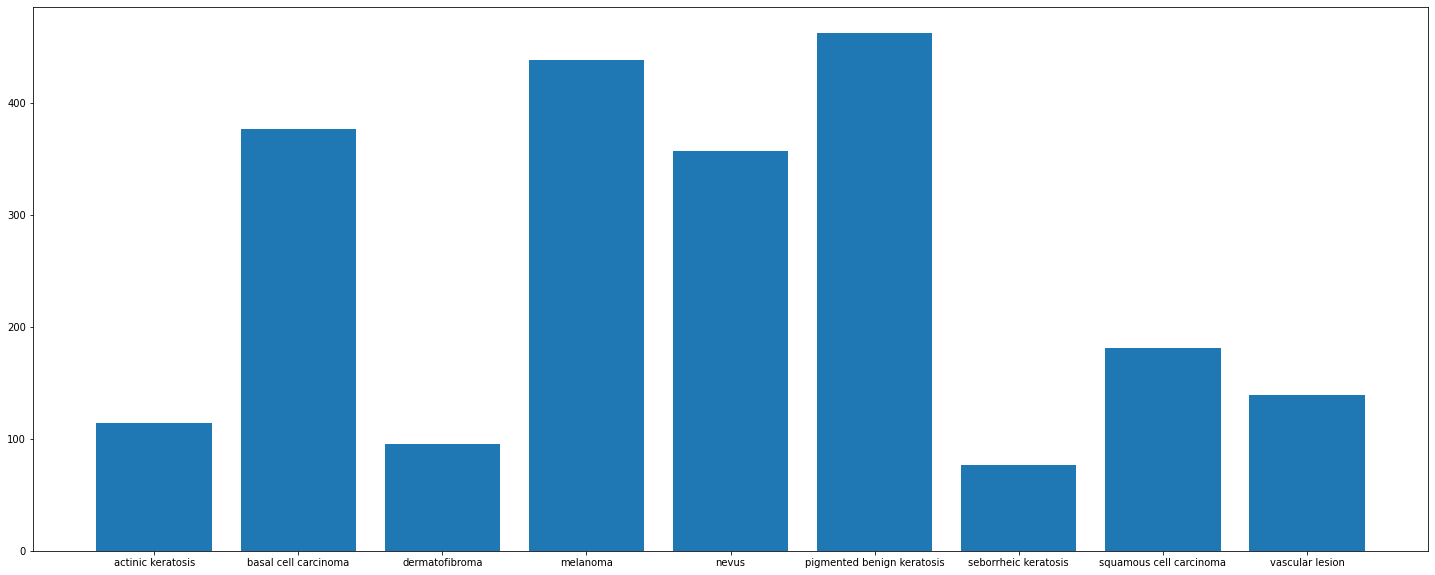

In [23]:
# Plotting a graph to validate the count of each class

count = []
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize = (25, 10))
plt.bar(class_names, count)

**Insights**  
Q. Which class has the least number of samples?  
A. The class which has the least number of samples is 'seborrheic keratosis'

Q. Which classes dominate the data in terms  proportionate to the number of samples?  
A. Melanoma and pigmented benign keratosis are dominating the data

In [24]:
# Rectifying the class imbalance

for i in class_names:
    p = Augmentor.Pipeline('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train', save_format = 'jpg')
    p.rotate(probability = 0.7, max_left_rotation = 10, max_right_rotation = 10)
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F69B2D54C10>: 100%|██████████| 500/500 [00:47<00:00, 10.52 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F69B2E43210>: 100%|██████████| 500/500 [00:48<00:00, 10.40 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F69B2DAA190>: 100%|██████████| 500/500 [00:44<00:00, 11.27 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F69B2AE7050>: 100%|██████████| 500/500 [00:47<00:00, 10.47 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=962x645 at 0x7F69B2E72450>: 100%|██████████| 500/500 [00:49<00:00, 10.01 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F69B2AFF590>: 100%|██████████| 500/500 [00:49<00:00, 10.10 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F69B2A68F50>: 100%|██████████| 500/500 [00:44<00:00, 11.14 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F69B287C4D0>: 100%|██████████| 500/500 [00:49<00:00, 10.17 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F69B2EA9090>: 100%|██████████| 500/500 [00:54<00:00,  9.24 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.

In [25]:
# Total count of the augmented images

data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [26]:
# Distribution of augmented data after adding new images to the original training data
# Creating a new dataframe 

for i in class_names:      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
df_new = pd.DataFrame(list(dataframe_dict_original.items()), columns = ['Path', 'Label'])
df_new

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
...,...,...
6734,/content/gdrive/MyDrive/Colab Notebooks/Melano...,vascular lesion
6735,/content/gdrive/MyDrive/Colab Notebooks/Melano...,vascular lesion
6736,/content/gdrive/MyDrive/Colab Notebooks/Melano...,vascular lesion
6737,/content/gdrive/MyDrive/Colab Notebooks/Melano...,vascular lesion


In [27]:
# List of new augmented images

df_new['Label'].value_counts()

pigmented benign keratosis    1402
melanoma                      1311
basal cell carcinoma          1096
nevus                         1072
squamous cell carcinoma        544
vascular lesion                436
actinic keratosis              330
dermatofibroma                 305
seborrheic keratosis           243
Name: Label, dtype: int64



### Step 8: Train the model - III

In [28]:
# Train the model on the data created using Augmentor

batch_size = 32
img_height = 180
img_width = 180

In [29]:
# Creating a training dataset

data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Skin cancer/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train1, seed = 123, validation_split = 0.2, subset = "training", image_size = (img_height, img_width), batch_size = batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [30]:
# Creating a validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train1, seed = 123, validation_split = 0.2, subset = 'validation', image_size = (img_height, img_width), batch_size = batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [31]:
# Creating a model

num_classes = 9

# Rescaling images to normalize pixel values between (0,1)
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3))   
])
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [32]:
# Compile the model

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [33]:
# Training the model with 30 epochs

epochs = 30
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs)

Epoch 1/30
113/113 [==============================] - 24s 196ms/step - loss: 2.0643 - accuracy: 0.1989 - val_loss: 2.0146 - val_accuracy: 0.1989
Epoch 2/30
113/113 [==============================] - 22s 182ms/step - loss: 2.0352 - accuracy: 0.2019 - val_loss: 2.0110 - val_accuracy: 0.2033
Epoch 3/30
113/113 [==============================] - 22s 183ms/step - loss: 2.0415 - accuracy: 0.2036 - val_loss: 2.0181 - val_accuracy: 0.1989
Epoch 4/30
113/113 [==============================] - 22s 181ms/step - loss: 2.0333 - accuracy: 0.2000 - val_loss: 2.0214 - val_accuracy: 0.1989
Epoch 5/30
113/113 [==============================] - 22s 181ms/step - loss: 2.0328 - accuracy: 0.1972 - val_loss: 2.0152 - val_accuracy: 0.2000
Epoch 6/30
113/113 [==============================] - 23s 187ms/step - loss: 2.0359 - accuracy: 0.2078 - val_loss: 2.0184 - val_accuracy: 0.1978
Epoch 7/30
113/113 [==============================] - 22s 182ms/step - loss: 2.0270 - accuracy: 0.2017 - val_loss: 2.0164 - val_ac

**Insights**  
The accuracy is 75.58% on the training dataset and 57.56% on validation dataset.

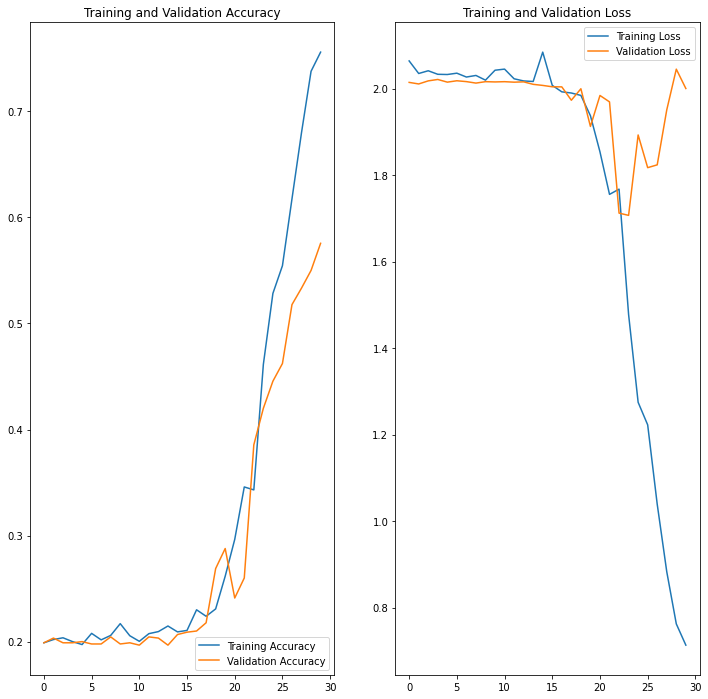

In [34]:
# Visualize the model results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

**Insights**
* The model has an improvement in terms of accuracy however, it still looks like the model is still overfitting.
* We can add more layers, dropout layers or neurons to overcome this issue.
* The hyperparameters may be tweaked to improve the model even further.